In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv("Halifax Infirmary Complex meters only.csv")
df.head()

,Property Name,Portfolio Manager ID,Portfolio Manager Meter ID,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,...,Last Modified Date,Last Modified By,Onsite Renewable System Energy Used Onsite,Onsite Renewable System Energy Used Onsite -Units,Onsite Renewable System Energy Exported Offsite,Onsite Renewable System Energy Exported Offsite- Units,Disposed Waste - Landfill %,Disposed Waste - Incineration %,Disposed Waste - Waste to Energy %,Disposed Waste - Don't Know %
0,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688874,2010-11-30,2010-12-31,Not Available,2500028.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688875,2010-12-31,2011-01-31,Not Available,2598588.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688876,2011-01-31,2011-02-28,Not Available,2090880.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688877,2011-02-28,2011-03-31,Not Available,2599416.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,Halifax Infirmary Complex,3965083,6793232,548452,Electric - Grid,232688878,2011-03-31,2011-04-30,Not Available,2459196.0,...,2014-02-13,CDHA,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [4]:
keep = [3,4,5,6,7,8,9,10,12]
keep_name = []
for num in keep:
    keep_name.append(df.columns[num])

In [158]:
df_2 = df[keep_name]
df_2.loc[:,'Start Date'] = df_2['Start Date'].replace("Not Available",np.nan)
df_2.loc[:,'End Date'] = df_2['End Date'].replace("Not Available",np.nan)
df_2.loc[:,'Cost ($)'] = df_2['Cost ($)'].replace("Not Available",np.nan)
df_2.loc[:,'Delivery Date'] = df_2['Delivery Date'].replace("Not Available",np.nan)

#df_2.loc[:,'Cost ($)'] = df_2['Cost ($)'].astype(float)
df_2['Cost ($)']= df_2['Cost ($)'].astype(float)

df_2['Start Date'] = pd.to_datetime(df_2['Start Date'])
df_2['End Date'] = pd.to_datetime(df_2['End Date'])
df_2['Delivery Date'] = pd.to_datetime(df_2['Delivery Date'])

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_10846/2361015933.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Cost ($)']= df_2['Cost ($)'].astype(float)
/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_10846/2361015933.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Start Date'] = pd.to_datetime(df_2['Start Date'])
/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_10846/2361015933.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [159]:
df_2.loc[:,'Year'] = df_2['Start Date'].dt.year

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_10846/3046810852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[:,'Year'] = df_2['Start Date'].dt.year


In [160]:
df_2.dtypes

Meter Name                      object
Meter Type                      object
Meter Consumption ID             int64
Start Date              datetime64[ns]
End Date                datetime64[ns]
Delivery Date           datetime64[ns]
Usage/Quantity                 float64
Usage Units                     object
Cost ($)                       float64
Year                           float64
dtype: object

In [18]:
df_2["Cost ($)"].value_counts()

Cost ($)
13397.83     2
4613.27      2
16904.92     2
9255.00      2
0.00         2
            ..
194217.09    1
199082.76    1
210951.17    1
201322.84    1
285178.86    1
Name: count, Length: 648, dtype: int64

In [9]:
df_2["Meter Type"].value_counts()

Meter Type
Natural Gas                      178
Electric - Grid                  169
Fuel Oil (No. 2)                 166
Potable: Mixed Indoor/Outdoor     94
Diesel                            37
Regulated Medical Waste           36
Name: count, dtype: int64

In [161]:
group_df = df_2.groupby('Meter Type')

## Natural Gas

In [51]:
Natural_Gas = group_df.get_group('Natural Gas')#.dtypes
Natural_Gas

,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,Usage Units,Cost ($),Year
169,Natural Gas,Natural Gas,232688249,2011-01-01,2011-02-01,Not Available,623700.0,cm (cubic meters),260488.19,2011.0
170,Natural Gas,Natural Gas,232688251,2011-02-01,2011-03-01,Not Available,545700.0,cm (cubic meters),211083.43,2011.0
171,Natural Gas,Natural Gas,232688253,2011-03-01,2011-04-01,Not Available,642000.0,cm (cubic meters),164134.47,2011.0
172,Natural Gas,Natural Gas,232688255,2011-04-01,2011-05-01,Not Available,538900.0,cm (cubic meters),142596.31,2011.0
173,Natural Gas,Natural Gas,232688257,2011-05-01,2011-06-01,Not Available,442100.0,cm (cubic meters),122970.35,2011.0
...,...,...,...,...,...,...,...,...,...,...
675,30201370,Natural Gas,10272219850,2025-06-01,2025-06-30,Not Available,14063.0,GJ,194217.09,2025.0
676,30201370,Natural Gas,10272219851,2025-07-01,2025-07-31,Not Available,14514.0,GJ,199082.76,2025.0
677,30201370,Natural Gas,10272219852,2025-08-01,2025-08-31,Not Available,15613.0,GJ,210951.17,2025.0
678,30201370,Natural Gas,10272219853,2025-09-01,2025-09-30,Not Available,14721.0,GJ,201322.84,2025.0


In [30]:
Natural_Gas['Usage Units'].unique()

array(['cm (cubic meters)', 'GJ'], dtype=object)

In [52]:
Natural_Gas_GJ = Natural_Gas[Natural_Gas['Usage Units']=="GJ"]
Natural_Gas_cm = Natural_Gas[Natural_Gas['Usage Units']=="cm (cubic meters)"]

In [53]:
Natural_Gas_cm.describe()

,Meter Consumption ID,Start Date,End Date,Usage/Quantity,Cost ($),Year
count,1.090000e+02,109,109,109.000000,1.090000e+02,109.000000
mean,1.187781e+09,2015-07-01 02:51:44.587155968,2015-07-31 11:26:58.348623872,564744.321101,2.920382e+05,2015.000000
min,2.326882e+08,2011-01-01 00:00:00,2011-02-01 00:00:00,330378.000000,9.534090e+04,2011.000000
25%,2.326883e+08,2013-04-01 00:00:00,2013-05-01 00:00:00,446000.000000,1.898975e+05,2013.000000
50%,6.037447e+08,2015-06-30 00:00:00,2015-07-31 00:00:00,506600.000000,2.425985e+05,2015.000000
75%,1.660657e+09,2017-09-30 00:00:00,2017-10-31 00:00:00,699200.000000,3.732193e+05,2017.000000
max,4.064681e+09,2019-12-28 00:00:00,2020-01-28 00:00:00,931200.000000,1.601179e+06,2019.000000
std,1.277166e+09,NaN,NaN,150732.448572,1.847115e+05,2.585573


In [90]:
avv = []
for year in Natural_Gas.Year.unique():
    if (year == 2022) or (year==2023):
        continue
    tt = Natural_Gas[Natural_Gas.Year==year]
    #print(year, tt['Cost ($)'].mean().round(2))
    #print("")
    avv.append(tt['Cost ($)'].mean().round(2))
avv

[np.float64(154569.72),
 np.float64(279318.08),
 np.float64(283860.39),
 np.float64(407367.06),
 np.float64(336596.56),
 np.float64(350239.67),
 np.float64(271887.27),
 np.float64(285210.1),
 np.float64(248547.25),
 np.float64(184431.6),
 np.float64(226011.91),
 np.float64(319203.74),
 np.float64(317813.8)]

In [95]:
np.arange(2011,2026)

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025])

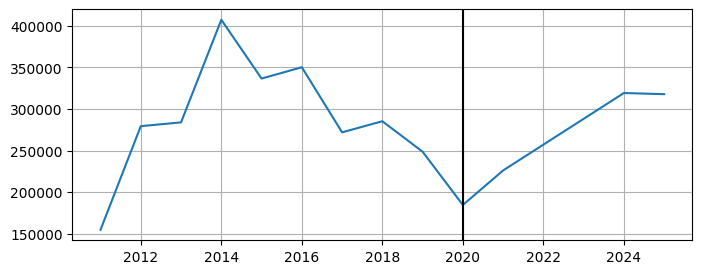

In [105]:
plt.figure(figsize=(8,3))
plt.plot([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       #2022, 2023, 
          2024, 2025],avv)
plt.grid()
plt.axvline(2020, c='k')

<Axes: xlabel='Start Date'>

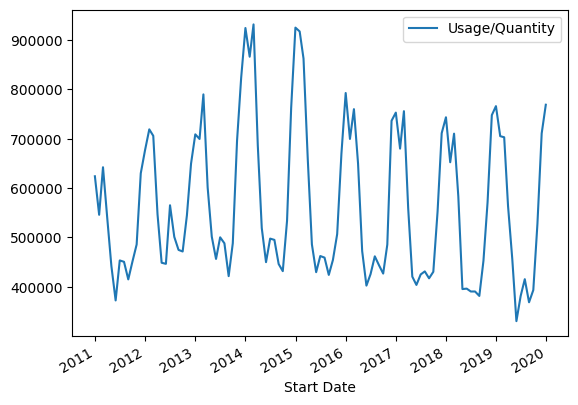

In [128]:
Natural_Gas[Natural_Gas.Year<2020].plot(x='Start Date',y='Usage/Quantity')

<Axes: xlabel='Start Date'>

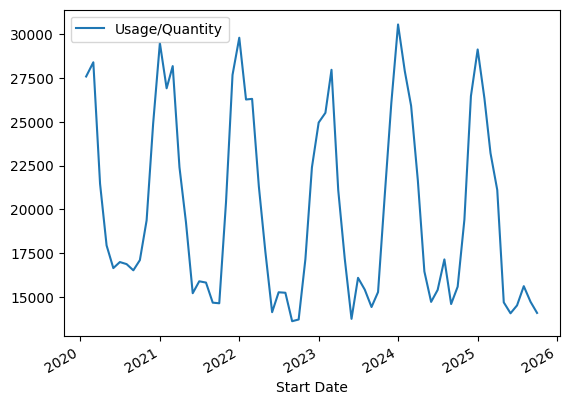

In [114]:
Natural_Gas[Natural_Gas.Year>=2020].plot(x='Start Date',y='Usage/Quantity')

In [130]:
df_2['Meter Type'].unique()

array(['Electric - Grid', 'Natural Gas', 'Diesel',
       'Potable: Mixed Indoor/Outdoor', 'Fuel Oil (No. 2)',
       'Regulated Medical Waste'], dtype=object)

## Electric - Grid

In [131]:
Electric = group_df.get_group('Electric - Grid')
Electric

,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,Usage Units,Cost ($),Year
0,548452,Electric - Grid,232688874,2010-11-30,2010-12-31,Not Available,2500028.0,kWh (thousand Watt-hours),262286.15,2010.0
1,548452,Electric - Grid,232688875,2010-12-31,2011-01-31,Not Available,2598588.0,kWh (thousand Watt-hours),276740.62,2010.0
2,548452,Electric - Grid,232688876,2011-01-31,2011-02-28,Not Available,2090880.0,kWh (thousand Watt-hours),233990.08,2011.0
3,548452,Electric - Grid,232688877,2011-02-28,2011-03-31,Not Available,2599416.0,kWh (thousand Watt-hours),276810.34,2011.0
4,548452,Electric - Grid,232688878,2011-03-31,2011-04-30,Not Available,2459196.0,kWh (thousand Watt-hours),265003.39,2011.0
...,...,...,...,...,...,...,...,...,...,...
164,548452,Electric - Grid,9165947908,2024-11-30,2024-12-31,Not Available,2249424.0,kWh (thousand Watt-hours),263497.53,2024.0
165,548452,Electric - Grid,9298842793,2024-12-31,2025-01-31,Not Available,2274336.0,kWh (thousand Watt-hours),271510.23,2024.0
166,548452,Electric - Grid,9407672596,2025-01-31,2025-02-17,Not Available,1246265.0,kWh (thousand Watt-hours),148779.12,2025.0
167,548452,Electric - Grid,9407672595,2025-02-17,2025-02-28,Not Available,806407.0,kWh (thousand Watt-hours),99163.87,2025.0


In [134]:
for year in Electric.Year.unique():
    tt = Electric[Electric.Year==year]
    print(year, tt.shape)

2010.0 (2, 10)
2011.0 (12, 10)
2012.0 (12, 10)
2013.0 (12, 10)
2014.0 (12, 10)
2015.0 (12, 10)
2016.0 (13, 10)
2017.0 (12, 10)
2018.0 (12, 10)
2019.0 (12, 10)
2020.0 (11, 10)
2021.0 (10, 10)
2022.0 (8, 10)
2023.0 (12, 10)
2024.0 (14, 10)
2025.0 (3, 10)


In [136]:
Electric[Electric.Year==2012]

,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,Usage Units,Cost ($),Year
14,548452,Electric - Grid,232688888,2012-01-31,2012-02-29,Not Available,2404944.0,kWh (thousand Watt-hours),268290.72,2012.0
15,548452,Electric - Grid,232688889,2012-02-29,2012-03-31,Not Available,2524320.0,kWh (thousand Watt-hours),278643.20,2012.0
16,548452,Electric - Grid,232688890,2012-03-31,2012-04-30,Not Available,2429136.0,kWh (thousand Watt-hours),270388.70,2012.0
17,548452,Electric - Grid,232688891,2012-04-30,2012-05-31,Not Available,2829924.0,kWh (thousand Watt-hours),327285.58,2012.0
18,548452,Electric - Grid,232688892,2012-05-31,2012-06-30,Not Available,3014424.0,kWh (thousand Watt-hours),351473.12,2012.0
19,548452,Electric - Grid,232688893,2012-06-30,2012-07-31,Not Available,3767892.0,kWh (thousand Watt-hours),422759.44,2012.0
20,548452,Electric - Grid,232688894,2012-07-31,2012-08-31,Not Available,3869964.0,kWh (thousand Watt-hours),428186.03,2012.0
21,548452,Electric - Grid,232688895,2012-08-31,2012-09-30,Not Available,3317328.0,kWh (thousand Watt-hours),378274.31,2012.0
22,548452,Electric - Grid,232688896,2012-09-30,2012-10-31,Not Available,2816823.0,kWh (thousand Watt-hours),351874.63,2012.0
23,548452,Electric - Grid,232688897,2012-10-31,2012-11-30,Not Available,2476224.0,kWh (thousand Watt-hours),285178.86,2012.0


In [138]:
avv2 = []
for year in Electric.Year.unique():
    if (year == 2022) or (year==2023):
        continue
    tt = Electric[Electric.Year==year]
    print(year, tt['Cost ($)'].mean().round(2))
    #print("")
    avv2.append(tt['Cost ($)'].mean().round(2))
#avv2

2010.0 269513.38
2011.0 309952.22
2012.0 327726.74
2013.0 330147.91
2014.0 334548.32
2015.0 345732.34
2016.0 392722.38
2017.0 353868.27
2018.0 357067.49
2019.0 254756.48
2020.0 249227.59
2021.0 256343.29
2024.0 257181.79
2025.0 175085.69


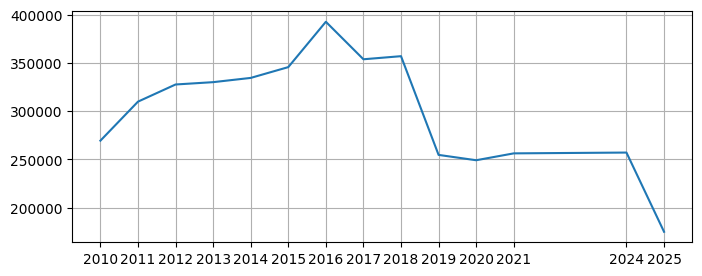

In [148]:

plt.figure(figsize=(8,3))
plt.plot([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       #2022, 2023, 
          2024, 2025],avv2)
plt.grid()
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       #2022, 2023, 
          2024, 2025])

plt.show()

<Axes: xlabel='Start Date'>

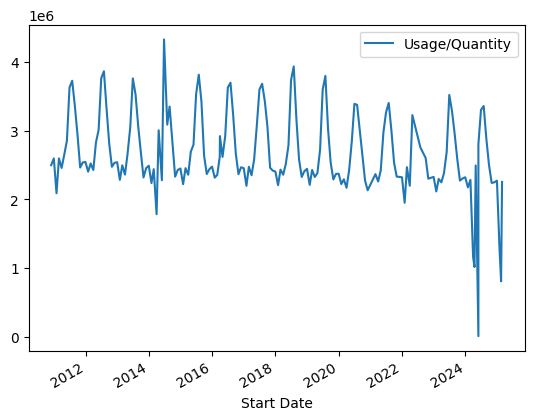

In [150]:
Electric.plot(x='Start Date',y='Usage/Quantity')

<Axes: xlabel='Start Date'>

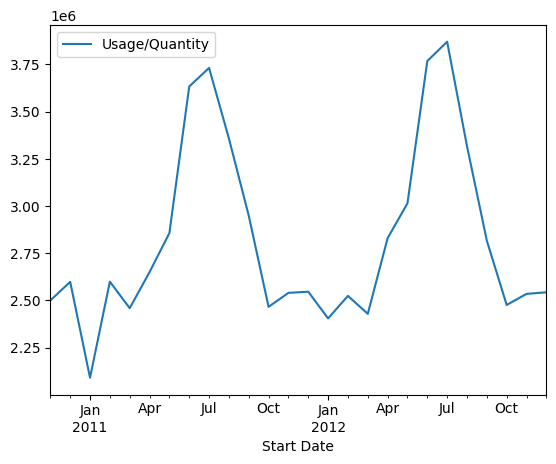

In [153]:

Electric[Electric.Year<2013].plot(x='Start Date',y='Usage/Quantity')

In [154]:
df_2['Meter Type'].unique()

array(['Electric - Grid', 'Natural Gas', 'Diesel',
       'Potable: Mixed Indoor/Outdoor', 'Fuel Oil (No. 2)',
       'Regulated Medical Waste'], dtype=object)

## Diesel

In [163]:
Diesel = group_df.get_group('Diesel')

Diesel.loc[:,'Year'] = Diesel['Delivery Date'].dt.year
Diesel

,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,Usage Units,Cost ($),Year
278,Halifax Infirmary Complex-D,Diesel,8632270540,NaT,NaT,2014-07-07,7099.3,Liters,9105.53,2014.0
279,Halifax Infirmary Complex-D,Diesel,8632270541,NaT,NaT,2014-07-07,2805.6,Liters,3598.44,2014.0
280,Halifax Infirmary Complex-D,Diesel,8632270545,NaT,NaT,2014-11-11,445.6,Liters,548.96,2014.0
281,Halifax Infirmary Complex-D,Diesel,8632270534,NaT,NaT,2016-08-10,412.1,Liters,337.56,2016.0
282,Halifax Infirmary Complex-D,Diesel,8632270535,NaT,NaT,2016-09-26,4500.0,Liters,3975.95,2016.0
283,Halifax Infirmary Complex-D,Diesel,8632270536,NaT,NaT,2017-02-15,3196.8,Liters,3213.47,2017.0
284,Halifax Infirmary Complex-D,Diesel,8632270537,NaT,NaT,2017-02-15,6753.4,Liters,6788.62,2017.0
285,Halifax Infirmary Complex-D,Diesel,8632270538,NaT,NaT,2017-12-21,10000.0,Liters,10548.95,2017.0
286,Halifax Infirmary Complex-D,Diesel,8632270539,NaT,NaT,2018-01-05,8900.3,Liters,9593.59,2018.0
287,Halifax Infirmary Complex-D,Diesel,8632202757,NaT,NaT,2020-09-22,7128.0,Liters,3094.98,2020.0


In [164]:
for year in Diesel.Year.unique():
    tt = Diesel[Diesel.Year==year]
    print(year, tt.shape)

2014.0 (3, 10)
2016.0 (2, 10)
2017.0 (3, 10)
2018.0 (1, 10)
2020.0 (1, 10)
2021.0 (5, 10)
2022.0 (7, 10)
2023.0 (6, 10)
2024.0 (3, 10)
2025.0 (6, 10)


In [165]:
avv3 = []
for year in Diesel.Year.unique():
    tt = Diesel[Diesel.Year==year]
    print(year, tt['Cost ($)'].mean().round(2))
    #print("")
    avv3.append(tt['Cost ($)'].mean().round(2))

2014.0 4417.64
2016.0 2156.76
2017.0 6850.35
2018.0 9593.59
2020.0 3094.98
2021.0 2712.41
2022.0 5696.66
2023.0 3400.77
2024.0 4262.21
2025.0 943.02


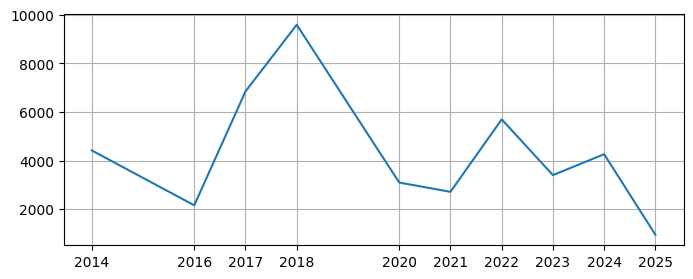

In [167]:
plt.figure(figsize=(8,3))
plt.plot([2014, 2016, 2017, 2018, 2020, 2021, 2022, 2023, 2024, 2025],avv3)

plt.grid()
plt.xticks([2014, 2016, 2017, 2018, 2020, 2021, 2022, 2023, 2024, 2025])

plt.show()

In [171]:
#Diesel.plot(x='Year',y='Usage/Quantity')

In [172]:
df_2['Meter Type'].unique()

array(['Electric - Grid', 'Natural Gas', 'Diesel',
       'Potable: Mixed Indoor/Outdoor', 'Fuel Oil (No. 2)',
       'Regulated Medical Waste'], dtype=object)

## Potable: Mixed Indoor/Outdoor

In [173]:
Potable = group_df.get_group('Potable: Mixed Indoor/Outdoor')
Potable

,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,Usage Units,Cost ($),Year
315,Potable All Meter,Potable: Mixed Indoor/Outdoor,252408854,2011-01-17,2011-02-16,NaT,42168.0,cm (cubic meters),67609.10,2011.0
316,Potable All Meter,Potable: Mixed Indoor/Outdoor,252408855,2011-02-16,2011-03-17,NaT,41074.0,cm (cubic meters),66111.37,2011.0
317,Potable All Meter,Potable: Mixed Indoor/Outdoor,252408856,2011-03-17,2011-04-19,NaT,36215.0,cm (cubic meters),58424.44,2011.0
318,Potable All Meter,Potable: Mixed Indoor/Outdoor,252408857,2011-04-19,2011-05-18,NaT,39265.0,cm (cubic meters),63249.54,2011.0
319,Potable All Meter,Potable: Mixed Indoor/Outdoor,252408858,2011-05-18,2011-06-16,NaT,41848.0,cm (cubic meters),67335.83,2011.0
...,...,...,...,...,...,...,...,...,...,...
404,Potable All Meter,Potable: Mixed Indoor/Outdoor,2358962607,2018-06-24,2018-07-25,NaT,40202.0,cm (cubic meters),110896.31,2018.0
405,Potable All Meter,Potable: Mixed Indoor/Outdoor,2403930325,2018-07-25,2018-08-23,NaT,41491.0,cm (cubic meters),114414.00,2018.0
406,Potable All Meter,Potable: Mixed Indoor/Outdoor,2557618841,2018-08-23,2018-09-24,NaT,40096.0,cm (cubic meters),110607.05,2018.0
407,Potable All Meter,Potable: Mixed Indoor/Outdoor,2557618842,2018-09-24,2018-10-24,NaT,34163.0,cm (cubic meters),94415.89,2018.0


In [174]:
for year in Potable.Year.unique():
    tt = Potable[Potable.Year==year]
    print(year, tt.shape)

2011.0 (12, 10)
2012.0 (12, 10)
2013.0 (12, 10)
2014.0 (12, 10)
2015.0 (12, 10)
2016.0 (12, 10)
2017.0 (12, 10)
2018.0 (10, 10)


In [175]:
avv4 = []
for year in Potable.Year.unique():
    if (year == 2022) or (year==2023):
        continue
    tt = Potable[Potable.Year==year]
    print(year, tt['Cost ($)'].mean().round(2))
    #print("")
    avv4.append(tt['Cost ($)'].mean().round(2))
#avv2

2011.0 78986.57
2012.0 93409.08
2013.0 87876.28
2014.0 100798.63
2015.0 106448.23
2016.0 110956.04
2017.0 115291.19
2018.0 96608.8


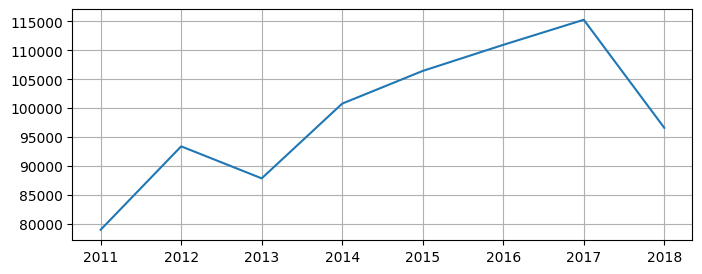

In [176]:
plt.figure(figsize=(8,3))
plt.plot([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],avv4)
plt.grid()
plt.xticks([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

plt.show()

<Axes: xlabel='Start Date'>

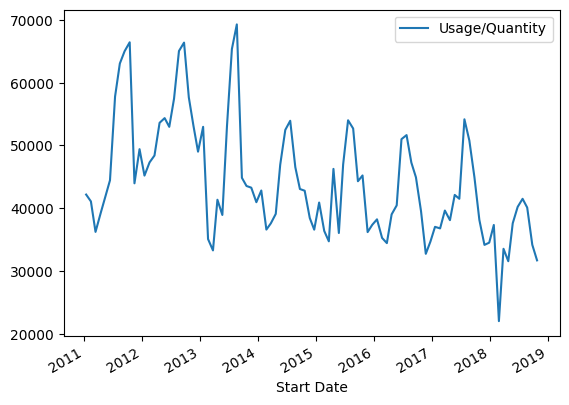

In [178]:
Potable.plot(x='Start Date',y='Usage/Quantity')

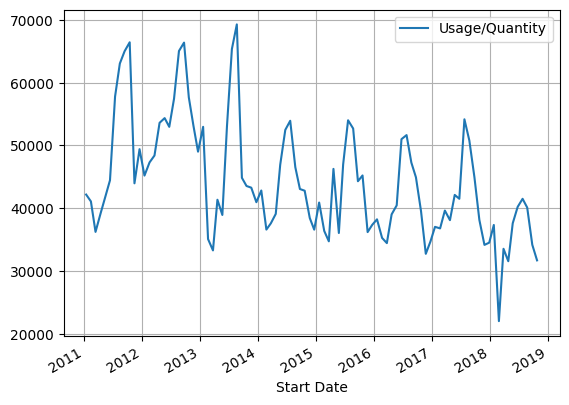

In [181]:
Potable.plot(x='Start Date',y='Usage/Quantity')
plt.grid()

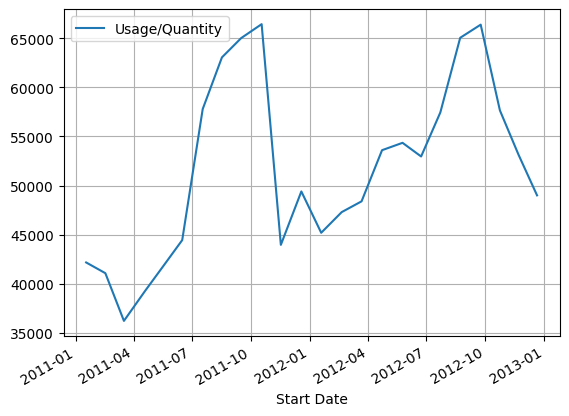

In [180]:
Potable[Potable.Year<2013].plot(x='Start Date',y='Usage/Quantity')
plt.grid()

In [182]:
df_2['Meter Type'].unique()

array(['Electric - Grid', 'Natural Gas', 'Diesel',
       'Potable: Mixed Indoor/Outdoor', 'Fuel Oil (No. 2)',
       'Regulated Medical Waste'], dtype=object)

## Fuel Oil (No. 2)

In [184]:
Fuel_Oil = group_df.get_group('Fuel Oil (No. 2)')

Fuel_Oil.loc[:,'Year'] = Fuel_Oil['Delivery Date'].dt.year

Fuel_Oil

,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,Usage Units,Cost ($),Year
409,Halifax Infirmary Complex-O,Fuel Oil (No. 2),8631816625,NaT,NaT,2013-02-05,31917.0,Liters,23593.69,2013.0
410,Halifax Infirmary Complex-O,Fuel Oil (No. 2),8631816626,NaT,NaT,2013-02-08,31294.0,Liters,23860.11,2013.0
411,Halifax Infirmary Complex-O,Fuel Oil (No. 2),8631816627,NaT,NaT,2013-02-11,33909.0,Liters,25853.92,2013.0
412,Halifax Infirmary Complex-O,Fuel Oil (No. 2),8631816628,NaT,NaT,2013-02-22,32493.0,Liters,25278.74,2013.0
413,Halifax Infirmary Complex-O,Fuel Oil (No. 2),8631816629,NaT,NaT,2013-02-28,31958.0,Liters,24487.66,2013.0
...,...,...,...,...,...,...,...,...,...,...
570,Halifax Infirmary Complex-O,Fuel Oil (No. 2),8632202487,NaT,NaT,2023-06-06,33033.0,Liters,23030.61,2023.0
571,Halifax Infirmary Complex-O,Fuel Oil (No. 2),8632202488,NaT,NaT,2024-01-23,38437.0,Liters,41185.25,2024.0
572,Halifax Infirmary Complex-O,Fuel Oil (No. 2),8632202489,NaT,NaT,2024-02-22,37910.0,Liters,41962.58,2024.0
573,Halifax Infirmary Complex-O,Fuel Oil (No. 2),9267261641,NaT,NaT,2025-01-23,20235.0,Liters,21386.37,2025.0


In [185]:
for year in Fuel_Oil.Year.unique():
    tt = Fuel_Oil[Fuel_Oil.Year==year]
    print(year, tt.shape)

2013.0 (7, 10)
2014.0 (2, 10)
2015.0 (4, 10)
2016.0 (7, 10)
2017.0 (3, 10)
2018.0 (4, 10)
2019.0 (101, 10)
2020.0 (23, 10)
2021.0 (3, 10)
2022.0 (4, 10)
2023.0 (4, 10)
2024.0 (2, 10)
2025.0 (2, 10)


In [201]:
#Fuel_Oil['Month'] = Fuel_Oil['Delivery Date'].dt.month

In [199]:
#Fuel_Oil[Fuel_Oil.Year==2019].groupby('Month').describe()['Usage/Quantity']

In [203]:
avv5 = []
for year in Fuel_Oil.Year.unique():
    if (year == 2022) or (year==2023):
        continue
    tt = Fuel_Oil[Fuel_Oil.Year==year]
    print(year, tt['Cost ($)'].mean().round(2))
    #print("")
    avv5.append(tt['Cost ($)'].mean().round(2))
#avv2

2013.0 56121.24
2014.0 21353.77
2015.0 20119.82
2016.0 13037.66
2017.0 20432.92
2018.0 20746.73
2019.0 5294.86
2020.0 8845.28
2021.0 22370.47
2024.0 41573.92
2025.0 31582.28


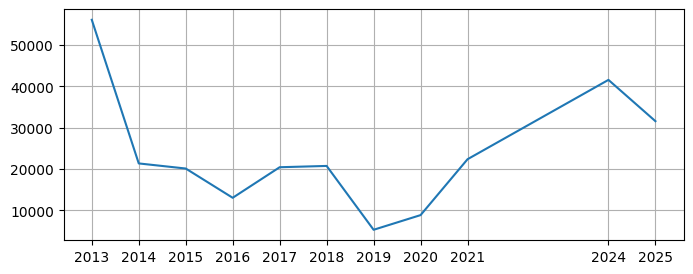

In [206]:
plt.figure(figsize=(8,3))
plt.plot([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       #2022, 2023, 
          2024, 2025],avv5)
plt.grid()
plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       #2022, 2023, 
          2024, 2025])

plt.show()

In [209]:
#Fuel_Oil.plot(x='Delivery Date',y='Usage/Quantity')

In [212]:
#Electric[Electric.Year<2020].plot(x='Delivery Date',y='Usage/Quantity')

In [213]:
df_2['Meter Type'].unique()

array(['Electric - Grid', 'Natural Gas', 'Diesel',
       'Potable: Mixed Indoor/Outdoor', 'Fuel Oil (No. 2)',
       'Regulated Medical Waste'], dtype=object)

## Regulated Medical Waste

In [214]:
Medical_Waste = group_df.get_group('Regulated Medical Waste')
Medical_Waste

,Meter Name,Meter Type,Meter Consumption ID,Start Date,End Date,Delivery Date,Usage/Quantity,Usage Units,Cost ($),Year
575,Stericycle,Regulated Medical Waste,2736844236,2016-01-01,2016-02-01,NaT,50112.6,kg (kilograms),57629.49,2016.0
576,Stericycle,Regulated Medical Waste,2736844237,2016-02-01,2016-03-01,NaT,45846.8,kg (kilograms),52723.82,2016.0
577,Stericycle,Regulated Medical Waste,2736844238,2016-03-01,2016-04-01,NaT,42942.4,kg (kilograms),49383.76,2016.0
578,Stericycle,Regulated Medical Waste,2736844239,2016-04-01,2016-05-01,NaT,48472.0,kg (kilograms),55742.80,2016.0
579,Stericycle,Regulated Medical Waste,2736844240,2016-05-01,2016-06-01,NaT,41241.0,kg (kilograms),43303.05,2016.0
580,Stericycle,Regulated Medical Waste,2736844241,2016-06-01,2016-07-01,NaT,54016.2,kg (kilograms),56717.01,2016.0
581,Stericycle,Regulated Medical Waste,2736844242,2016-07-01,2016-08-01,NaT,44150.0,kg (kilograms),46357.50,2016.0
582,Stericycle,Regulated Medical Waste,2736844243,2016-08-01,2016-09-01,NaT,46278.2,kg (kilograms),48592.11,2016.0
583,Stericycle,Regulated Medical Waste,2736844244,2016-09-01,2016-10-01,NaT,39082.2,kg (kilograms),41036.31,2016.0
584,Stericycle,Regulated Medical Waste,2736844245,2016-10-01,2016-11-01,NaT,56598.8,kg (kilograms),59428.74,2016.0


In [215]:
for year in Medical_Waste.Year.unique():
    tt = Medical_Waste[Medical_Waste.Year==year]
    print(year, tt.shape)

2016.0 (12, 10)
2017.0 (12, 10)
2018.0 (12, 10)


In [217]:
avv6 = []
for year in Medical_Waste.Year.unique():
    if (year == 2022) or (year==2023):
        continue
    tt = Medical_Waste[Medical_Waste.Year==year]
    print(year, tt['Cost ($)'].mean().round(2))
    #print("")
    avv6.append(tt['Cost ($)'].mean().round(2))
#avv2

2016.0 50633.08
2017.0 48503.68
2018.0 49752.45


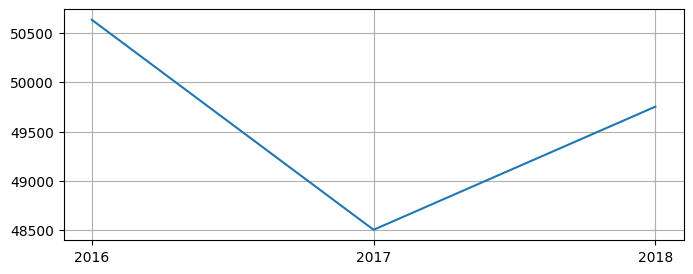

In [219]:
plt.figure(figsize=(8,3))
plt.plot([2016, 2017, 2018],avv6)
plt.grid()
plt.xticks([2016, 2017, 2018])
plt.show()

<Axes: xlabel='Start Date'>

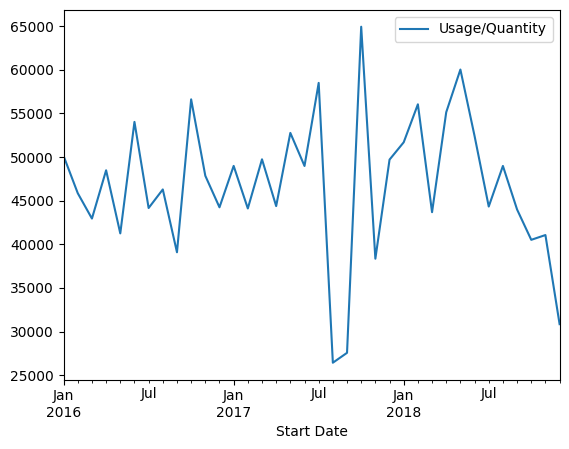

In [220]:
Medical_Waste.plot(x='Start Date',y='Usage/Quantity')


In [226]:
#Medical_Waste[Medical_Waste.Year<2017].plot(x='Start Date',y='Usage/Quantity')